#### Import

In [1]:
import os
import sys
os.getcwd()  # Check current working directory
os.chdir('/home/sayem/Desktop/ImageCaption/notebooks')  # Change if necessary
sys.path.append('../src')  # Now append the src path

In [2]:
# import sys
# # Add the src directory to the Python path
# sys.path.append('../src')
import torch
torch.set_float32_matmul_precision('medium')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
from sklearn.model_selection import train_test_split

import pandas as pd
# Set the maximum number of rows to 100 (default is 10 in newer versions)
pd.set_option('display.max_rows', 500)
# Set the maximum number of columns to 50 (default is 20)
pd.set_option('display.max_columns', 1500)

coco_data_folder = Path("/media/sayem/510B93E12554BBD1/CocoData")

# Define your device as either 'cuda' for GPU or 'cpu' for CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### Dataset Building

In [3]:
import torchvision.transforms as transforms
from torchvision.datasets import CocoCaptions
from torch.utils.data import DataLoader
from dataset.dataset import CocoCaptionsDataset, collate_fn, Vocabulary

# # Image transformations
# transform = transforms.Compose([
#     transforms.Resize(256),  # Resize the image to a larger size while maintaining aspect ratio
#     transforms.CenterCrop(224),  # Center crop the image to 224x224
#     transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
#     transforms.ColorJitter(brightness=0.1, contrast=0.1, \
#         saturation=0.1, hue=0.1),  # Random color adjustments
#     transforms.ToTensor(),  # Convert the image to a PyTorch tensor
#     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # Normalize with mean and std for pretrained models
# ])

transform = transforms.Compose([
    transforms.Resize(256),  # Resize the image
    transforms.CenterCrop(224),  # Center crop the image
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.RandomRotation(degrees=90),  # Rotate the image by up to ±30 degrees
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),  # Random color adjustments
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # Normalize for pretrained models
])

In [4]:
import pickle
from pathlib import Path
from collections import Counter
from pycocotools.coco import COCO
import nltk
from nltk.tokenize import word_tokenize

import nltk
from pathlib import Path

# Set the NLTK data directory and download 'punkt' tokenizer model
nltk_data_path = Path("/home/sayem/Desktop/ImageCaption/nltk_data")
nltk_data_path.mkdir(parents=True, exist_ok=True)
nltk.data.path.append(str(nltk_data_path))
nltk.download('punkt', download_dir=str(nltk_data_path))
nltk.download('averaged_perceptron_tagger', download_dir=str(nltk_data_path))


# # Download the 'punkt' tokenizer models
# nltk.download('punkt', download_dir=nltk_data_path)

def build_vocab(json_file, threshold=5):
    coco = COCO(json_file)
    counter = Counter()

    for i, id in enumerate(coco.anns.keys()):
        caption = str(coco.anns[id]['caption']).lower()
        tokens = word_tokenize(caption)
        counter.update(tokens)

    vocab = Vocabulary()

    for word, count in counter.items():
        if count >= threshold:
            vocab.add_word(word)

    return vocab

# Paths
coco_data_folder = Path("/media/sayem/510B93E12554BBD1/CocoData")
annotations_file = coco_data_folder / 'annotations' / 'captions_train2017.json'

data_folder = Path('/home/sayem/Desktop/ImageCaption/data')
data_folder.mkdir(parents=True, exist_ok=True)  # Ensure the directory exists
vocab_file = data_folder / 'vocabulary.pkl'

# Check if vocabulary file exists
if not vocab_file.exists():
    # Build the vocabulary from the annotations file
    vocab = build_vocab(str(annotations_file))
    
    # Save the vocabulary
    try:
        with vocab_file.open('wb') as f:
            pickle.dump(vocab, f)
        print("Saved vocabulary to file.")
    except FileNotFoundError as e:
        print(f"Error saving file: {e}")
else:
    # Load the existing vocabulary
    try:
        with vocab_file.open('rb') as f:
            vocab = pickle.load(f)
        print("Loaded vocabulary from file.")
    except FileNotFoundError as e:
        print(f"Error loading file: {e}")

Loaded vocabulary from file.


[nltk_data] Downloading package punkt to
[nltk_data]     /home/sayem/Desktop/ImageCaption/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/sayem/Desktop/ImageCaption/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### Testing

Model CNN_LSTM loaded successfully.
Model GCNN_LSTM loaded successfully.
Model GCNN_SE_LSTM loaded successfully.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Caption for 0 Degree Rotated Image using CNN_LSTM:


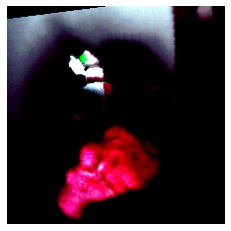

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<start> a person holding a toothbrush in their hand . <end>

Caption for 90 Degree Rotated Image using CNN_LSTM:


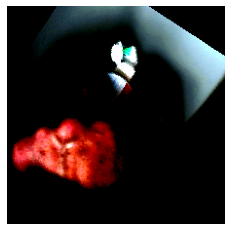

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<start> a person holding a banana in their hand . <end>

Caption for 270 Degree Rotated Image using CNN_LSTM:


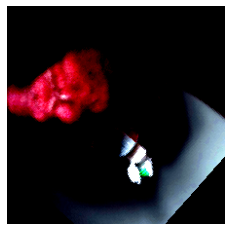

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<start> a man holding a toothbrush in his mouth . <end>

Semantic Consistency Score for CNN_LSTM: 0.38461538461538464

Caption for 0 Degree Rotated Image using GCNN_LSTM:


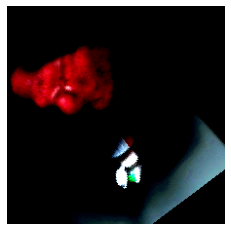

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<start> a man in a suit and tie is smiling . <end>

Caption for 90 Degree Rotated Image using GCNN_LSTM:


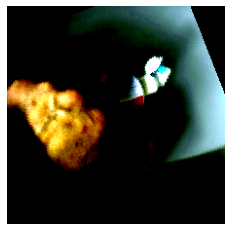

<start> a man is holding a banana in his mouth . <end>

Caption for 270 Degree Rotated Image using GCNN_LSTM:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


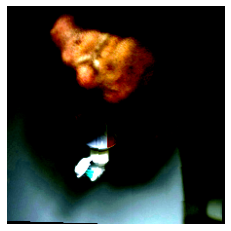

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<start> a man in a suit and tie is smiling . <end>

Semantic Consistency Score for GCNN_LSTM: 0.42857142857142855

Caption for 0 Degree Rotated Image using GCNN_SE_LSTM:


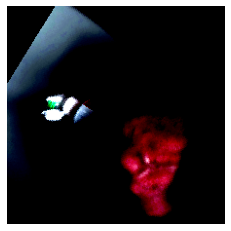

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<start> a man is holding a banana in his mouth . <end>

Caption for 90 Degree Rotated Image using GCNN_SE_LSTM:


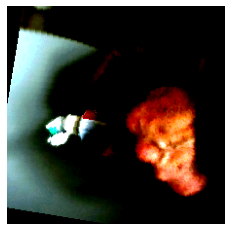

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<start> a man with a beard wearing a tie . <end>

Caption for 270 Degree Rotated Image using GCNN_SE_LSTM:


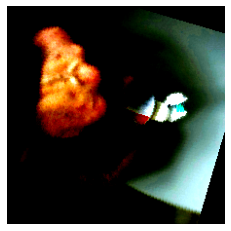

<start> a man with a beard wearing a tie . <end>

Semantic Consistency Score for GCNN_SE_LSTM: 0.2857142857142857


In [5]:
import random
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import torch
from nltk.tokenize import word_tokenize

# Define the paths where the models are saved
model_paths = {
    "CNN_LSTM": Path("/home/sayem/Desktop/ImageCaption/trained_models/complete_image_captioning_model_CNN_LSTM.pth"),
    "GCNN_LSTM": Path("/home/sayem/Desktop/ImageCaption/trained_models/complete_image_captioning_model_GCNN_LSTM.pth"),
    "GCNN_SE_LSTM": Path("/home/sayem/Desktop/ImageCaption/trained_models/complete_image_captioning_model_GCNN_with_attention_LSTM.pth")
}

# Load models
models = {}
for name, path in model_paths.items():
    if path.is_file():
        model = torch.load(path)
        model.to('cuda' if torch.cuda.is_available() else 'cpu')
        model.eval()
        models[name] = model
        print(f"Model {name} loaded successfully.")
    else:
        print(f"Model file not found at {path}")

# Assuming 'transform', 'vocab', and 'device' are already defined and initialized

# Directory containing test images
coco_data_folder = Path("/media/sayem/510B93E12554BBD1/CocoData")
test_images_dir = coco_data_folder / 'test2017'

# List all image files in the directory
test_image_files = [f for f in test_images_dir.iterdir() if f.is_file()]

# Select a random image file
random_image_file = random.choice(test_image_files)

# Define the image loading function with rotation
def load_image(image_path, transform, rotate=False, rotation_angle=0):
    image = Image.open(image_path).convert('RGB')
    if rotate:
        image = image.rotate(rotation_angle)
    if transform is not None:
        image = transform(image).unsqueeze(0)
    return image

# Function to display image and generate caption
def display_and_caption(image, model, vocab, device):
    image_tensor = image.to(device)
    plt.imshow(image.squeeze(0).permute(1, 2, 0))
    plt.axis('off')
    plt.show()

    with torch.no_grad():
        features = model.encoder(image_tensor)
        sampled_ids = model.decoder.sample(features)
        sampled_ids = sampled_ids[0].cpu().numpy()

    caption = []
    for word_id in sampled_ids:
        word = vocab.idx2word[word_id]
        caption.append(word)
        if word == '<end>':
            break
    caption = ' '.join(caption)
    return caption

# Function to preprocess and tokenize caption
def process_caption(caption):
    # Convert to lowercase and tokenize
    tokens = word_tokenize(caption.lower())
    # Filter out punctuation and special characters
    words = [word for word in tokens if word.isalpha()]
    return words

# Function to calculate semantic consistency
def calculate_semantic_consistency(captions):
    processed_captions = [process_caption(caption) for caption in captions]
    common_elements = set.intersection(*map(set, processed_captions))
    total_elements = set.union(*map(set, processed_captions))
    consistency_score = len(common_elements) / len(total_elements) if total_elements else 0
    return consistency_score

# Rotation angles
rotation_angles = [0, 90, 270]

# Test each model with the image at different rotations and calculate semantic consistency
for model_name, model in models.items():
    captions = []
    for angle in rotation_angles:
        print(f"\nCaption for {angle} Degree Rotated Image using {model_name}:")
        rotated_image = load_image(random_image_file, transform, rotate=True, rotation_angle=angle)
        caption = display_and_caption(rotated_image, model, vocab, device)
        captions.append(caption)
        print(caption)

    # Calculate and print the semantic consistency score for the model
    consistency_score = calculate_semantic_consistency(captions)
    print(f"\nSemantic Consistency Score for {model_name}: {consistency_score}")


Paired t-test between CNN_LSTM and GCNN_LSTM: t-statistic = -18.83115740552696, p-value = 9.086163450165813e-79
Paired t-test between CNN_LSTM and GCNN_SE_LSTM: t-statistic = 1.8120423106611168, p-value = 0.06998703106472129
Paired t-test between GCNN_LSTM and GCNN_SE_LSTM: t-statistic = 21.020402974367375, p-value = 1.412677010749482e-97


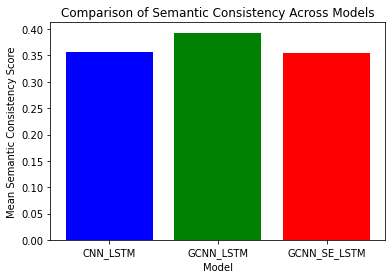

In [6]:
import random
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import torch
from nltk.tokenize import word_tokenize
import numpy as np
from scipy.stats import ttest_rel


# Get the list of all image files in the COCO test directory
test_image_files = [f for f in test_images_dir.iterdir() if f.is_file()]

# Updating the sample size to the size of the test dataset
n_samples = len(test_image_files)

# Function to calculate semantic consistency for a single image, without displaying it
def caption_without_display(image, model, vocab, device):
    image_tensor = image.to(device)
    with torch.no_grad():
        features = model.encoder(image_tensor)
        sampled_ids = model.decoder.sample(features)
        sampled_ids = sampled_ids[0].cpu().numpy()

    caption = [vocab.idx2word[word_id] for word_id in sampled_ids if word_id != vocab.word2idx['<end>']]
    return ' '.join(caption)

# Function to calculate semantic consistency for a single image
def semantic_consistency_for_image(image_file, models, transform, vocab, device, rotation_angles):
    consistency_scores = {}
    for model_name, model in models.items():
        captions = []
        for angle in rotation_angles:
            rotated_image = load_image(image_file, transform, rotate=True, rotation_angle=angle)
            caption = caption_without_display(rotated_image, model, vocab, device)
            captions.append(caption)

        consistency_score = calculate_semantic_consistency(captions)
        consistency_scores[model_name] = consistency_score
    return consistency_scores

# Collecting semantic consistency scores
all_scores = {name: [] for name in models.keys()}
for _ in range(n_samples):
    image_file = random.choice(test_image_files)
    scores = semantic_consistency_for_image(image_file, models, transform, vocab, device, rotation_angles)
    for model_name, score in scores.items():
        all_scores[model_name].append(score)

# Performing statistical tests
model_names = list(models.keys())
p_values = np.zeros((len(model_names), len(model_names)))  # Matrix to store p-values

for i in range(len(model_names)):
    for j in range(i+1, len(model_names)):
        model1, model2 = model_names[i], model_names[j]
        t_stat, p_value = ttest_rel(all_scores[model1], all_scores[model2])
        p_values[i, j] = p_value
        print(f"Paired t-test between {model1} and {model2}: t-statistic = {t_stat}, p-value = {p_value}")

# Calculating mean consistency scores for each model
means = [np.mean(all_scores[model_name]) for model_name in model_names]

# Plotting mean semantic consistency scores
plt.bar(model_names, means, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Mean Semantic Consistency Score')
plt.title('Comparison of Semantic Consistency Across Models')
plt.show()


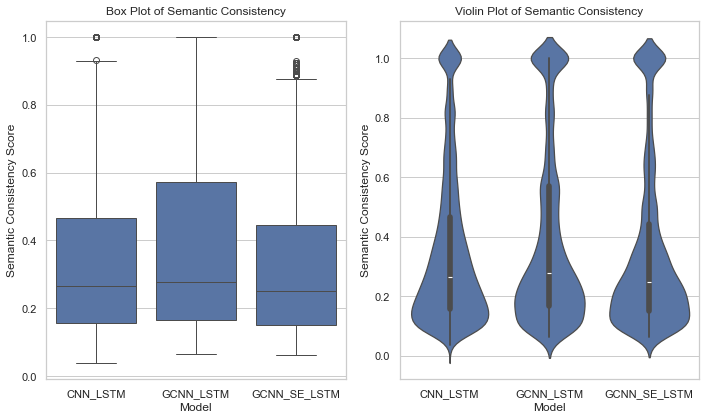

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data for plotting
data_for_plotting = []
for model_name in model_names:
    for score in all_scores[model_name]:
        data_for_plotting.append({'Model': model_name, 'Semantic Consistency Score': score})
df = pd.DataFrame(data_for_plotting)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a box plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Model', y='Semantic Consistency Score', data=df)
plt.title('Box Plot of Semantic Consistency')

# Creating a violin plot
plt.subplot(1, 2, 2)
sns.violinplot(x='Model', y='Semantic Consistency Score', data=df)
plt.title('Violin Plot of Semantic Consistency')

plt.tight_layout()
plt.show()

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define a simple attention mechanism
class SimpleAttention(nn.Module):
    def __init__(self, feature_size, key_size, value_size, query_size):
        super(SimpleAttention, self).__init__()
        # Initialize learnable weights for transforming input to Q, K, V
        self.key_layer = nn.Linear(feature_size, key_size, bias=False)
        self.value_layer = nn.Linear(feature_size, value_size, bias=False)
        self.query_layer = nn.Linear(feature_size, query_size, bias=False)

    def forward(self, x):
        # x is the input sequence of shape (batch_size, seq_len, feature_size)

        # Compute Q, K, V
        Q = self.query_layer(x)
        K = self.key_layer(x)
        V = self.value_layer(x)

        # Calculate attention scores
        # Shape of scores: (batch_size, seq_len, seq_len)
        scores = torch.bmm(Q, K.transpose(1, 2)) / torch.sqrt(torch.tensor(K.size(-1), dtype=torch.float32))

        # Apply softmax to get attention weights
        attention_weights = F.softmax(scores, dim=-1)

        # Multiply weights by V to get the final output
        output = torch.bmm(attention_weights, V)

        return output, attention_weights

# Example Usage

# Set random seed for reproducibility
torch.manual_seed(0)

# Example input: batch_size=2, seq_len=9 (for 3x3 image), feature_size=3 (RGB channels)
input_seq = torch.randn(2, 9, 3)

# Create the attention model
attention_model = SimpleAttention(feature_size=3, key_size=3, value_size=3, query_size=3)

# Forward pass
output, attention_weights = attention_model(input_seq)

# Output shapes
print("Output shape:", output.shape)  # Expected: (batch_size, seq_len, value_size)
print("Attention weights shape:", attention_weights.shape)  # Expected: (batch_size, seq_len, seq_len)


Output shape: torch.Size([2, 9, 3])
Attention weights shape: torch.Size([2, 9, 9])
